<h1 align="center"> Credit Fraud Detector </h1>

<h2> Introduction </h2>
In this kernel we will use various predictive models to see how accurate they  are in detecting whether a transaction is a normal payment or a fraud. As described in the dataset, the features are scaled and the names of the features are not shown due to privacy reasons. Nevertheless, we can still analyze some important aspects of the dataset. Let's start!


<h2> Our Goals: </h2>
<ul>
<li> Understand the little distribution of the "little" data that was provided to us. </li>
<li> Create a 50/50 sub-dataframe ratio of "Fraud" and "Non-Fraud" transactions. (NearMiss Algorithm) </li>



<h2> Outline: </h2>
I. <b>Understanding our data</b><br>
a) [Gather Sense of our data](#gather)<br><br>

II. <b>Preprocessing</b><br>
a) [Scaling and Distributing](#distributing)<br>
b) [Splitting the Data](#splitting)<br><br>

III. <b>Random UnderSampling and Oversampling</b><br>
a) [Distributing and Correlating](#correlating)<br>
b) [Anomaly Detection](#anomaly)<br>


## Gather Sense of Our Data:
<a id="gather"></a>
The first thing we must do is gather a <b> basic sense </b> of our data. Remember, except for the <b>transaction</b> and <b>amount</b> we dont know what the other columns are (due to privacy reasons). The only thing we know, is that those columns that are unknown have been scaled already.   

<h3> Summary: </h3>
<ul>
<li>The transaction amount is relatively <b>small</b>. The mean of all the mounts made is approximately USD 88. </li>
<li>There are no <b>"Null"</b> values, so we don't have to work on ways to replace values. </li>
<li> Most of the transactions were <b>Non-Fraud</b> (99.83%) of the time, while <b>Fraud</b> transactions occurs (017%) of the time in the dataframe. </li>
</ul>

<h3> Feature Technicalities: </h3>
<ul>
<li> <b>PCA Transformation: </b>  The description of the data says that all the features went through a PCA transformation (Dimensionality Reduction technique) (Except for time and amount).</li>
<li> <b>Scaling:</b> Keep in mind that in order to implement a PCA transformation features need to be previously scaled. (In this case, all the V features have been scaled or at least that is what we are assuming the people that develop the dataset did.)</li>
</ul>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


In [2]:
#Import the dataset
df = pd.read_csv('/content/creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Describe the data
df.shape

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
# Check for missing values
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


There is no missing values

Class Counts:
 Class
0    284315
1       492
Name: count, dtype: int64


<Figure size 800x500 with 0 Axes>

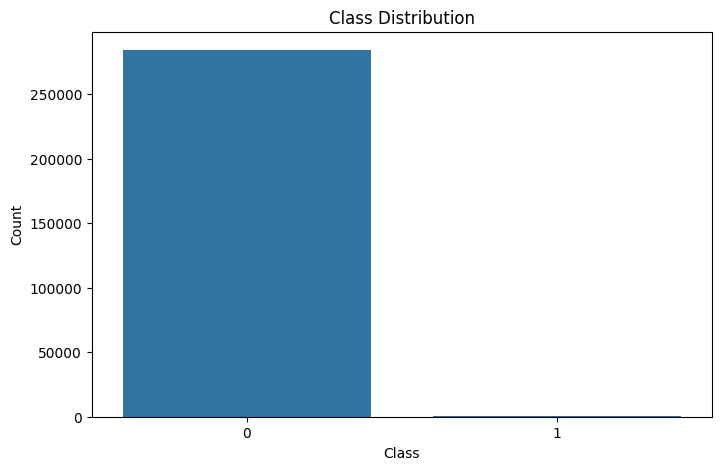

Skewness of the class distribution: nan


In [5]:
# Check for scewness of the classes
# Count the number of occurrences of each class
class_counts = df['Class'].value_counts()
print("Class Counts:\n", class_counts)

# Set the figure size
plt.figure(figsize=(8, 5))

# Create a bar plot
# Visualization: Bar Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Class', order=df['Class'].value_counts().index)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Calculate skewness
skewness = class_counts.skew()
print(f'Skewness of the class distribution: {skewness:.3f}')

Definetly, the distribution is scewed to the left - most ammount if operations are not fraud

In [6]:

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


**Note:**  Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

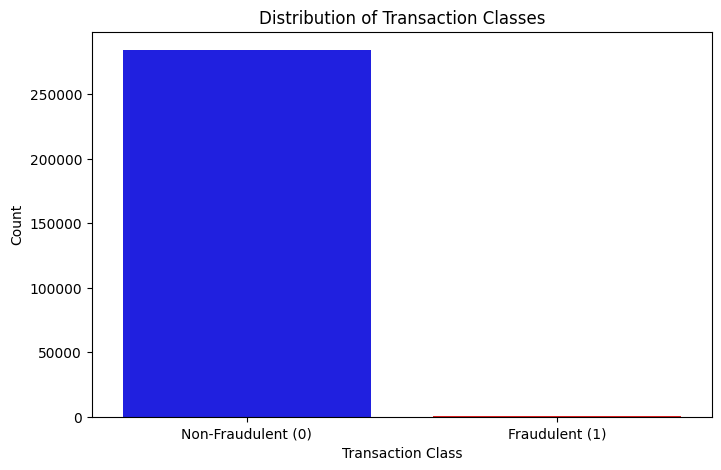

In [7]:
#Create a count plot using Seaborn to visualize the distribution of classes in the dataframe df, indicating non-fraudulent (0) and fraudulent (1) transactions, with specific colors for each class.

# Create a count plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Class', palette={'0': 'blue', '1': 'red'})
plt.title('Distribution of Transaction Classes')
plt.xlabel('Transaction Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent (0)', 'Fraudulent (1)'])
plt.show()

**Distributions:** By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

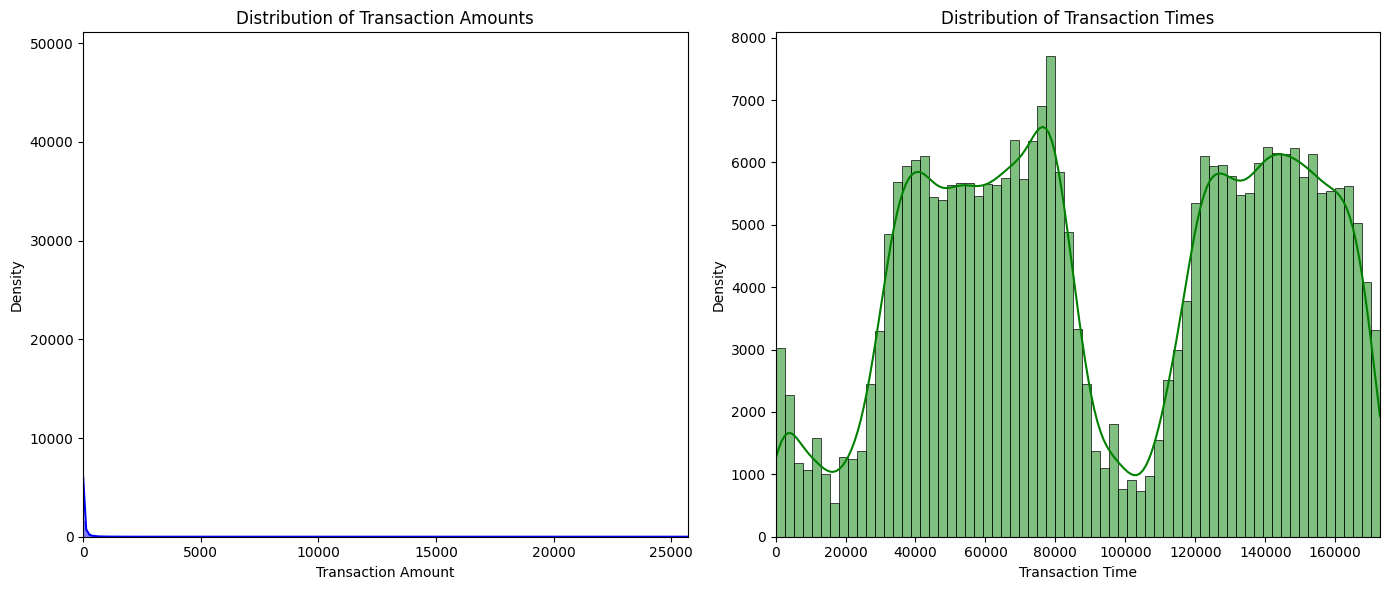

In [8]:
# TODO : Generate two distribution plots side by side, one for transaction amounts and the other for transaction times, using the data from the df dataframe, with specific colors and custom title and x-axis limits for each plot.
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for transaction amounts
sns.histplot(data=df, x='Amount', ax=axes[0], color='blue', kde=True)
axes[0].set_title('Distribution of Transaction Amounts')
axes[0].set_xlabel('Transaction Amount')
axes[0].set_xlim(0, df['Amount'].max())  # Set x-axis limits
axes[0].set_ylabel('Density')

# Plot for transaction times
sns.histplot(data=df, x='Time', ax=axes[1], color='green', kde=True)
axes[1].set_title('Distribution of Transaction Times')
axes[1].set_xlabel('Transaction Time')
axes[1].set_xlim(0, df['Time'].max())  # Set x-axis limits
axes[1].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()

<h2> Scaling and Distributing </h2>
<a id="distributing"></a>
In this phase of our kernel, we will first scale the columns comprise of <b>Time</b> and <b>Amount </b>. Time and amount should be scaled as the other columns. On the other hand, we need to also create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases, helping our algorithms better understand patterns that determines whether a transaction is a fraud or not.

<h3> What is a sub-Sample?</h3>
In this scenario, our subsample will be a dataframe with a 50/50 ratio of fraud and non-fraud transactions. Meaning our sub-sample will have the same amount of fraud and non fraud transactions.

<h3> Why do we create a sub-Sample?</h3>
In the beginning of this notebook we saw that the original dataframe was heavily imbalanced! Using the original dataframe  will cause the following issues:
<ul>
<li><b>Overfitting: </b>Our classification models will assume that in most cases there are no frauds! What we want for our model is to be certain when a fraud occurs. </li>
<li><b>Wrong Correlations:</b> Although we don't know what the "V" features stand for, it will be useful to understand how each of this features influence the result (Fraud or No Fraud) by having an imbalance dataframe we are not able to see the true correlations between the class and features. </li>
</ul>

<h3>Summary: </h3>
<ul>
<li> <b>Scaled amount </b> and <b> scaled time </b> are the columns with scaled values. </li>
<li> There are <b>492 cases </b> of fraud in our dataset so we can randomly get 492 cases of non-fraud to create our new sub dataframe. </li>
<li>We concat the 492 cases of fraud and non fraud, <b>creating a new sub-sample. </b></li>
</ul>

In [9]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
scaler = RobustScaler()

# Scale 'Amount' and 'Time' columns
scaled_values = scaler.fit_transform(df[['Amount', 'Time']])

# Create new columns in the DataFrame
df['scaled_amount'] = scaled_values[:, 0]
df['scaled_time'] = scaled_values[:, 1]

# Replace the original columns with the scaled versions
df[['Amount', 'Time']] = scaled_values

# Display the first few rows of the updated DataFrame
print(df.head())

       Time        V1        V2        V3        V4        V5        V6  \
0 -0.994983 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -0.994983  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -0.994972 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -0.994972 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -0.994960 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V23       V24       V25       V26  \
0  0.239599  0.098698  0.363787  ... -0.110474  0.066928  0.128539 -0.189115   
1 -0.078803  0.085102 -0.255425  ...  0.101288 -0.339846  0.167170  0.125895   
2  0.791461  0.247676 -1.514654  ...  0.909412 -0.689281 -0.327642 -0.139097   
3  0.237609  0.377436 -1.387024  ... -0.190321 -1.175575  0.647376 -0.221929   
4  0.592941 -0.270533  0.817739  ... -0.137458  0.141267 -0.206010  0.502292   

        V27       V28    Amount  Class  scaled_amount  scaled_time  

In [10]:
#Remove the 'scaled_amount' and 'scaled_time' columns from the dataframe df.
#Reorder the columns to place 'scaled_amount' and 'scaled_time' at the beginning
df = df[['scaled_amount', 'scaled_time'] + [col for col in df.columns if col not in ['scaled_amount', 'scaled_time']]]

df.drop(columns=['scaled_amount', 'scaled_time'], inplace=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


### Splitting the Data (Original DataFrame)
<a id="splitting"></a>
Before proceeding with the <b> Random UnderSampling technique</b> we have to separate the orginal dataframe. <b> Why? for testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques.</b> The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.  

In [11]:
# TODO: Calculate and print the percentage of non-fraudulent and fraudulent transactions
total_transactions = df.shape[0]
fraudulent_count = df['Class'].value_counts()[1]
non_fraudulent_count = df['Class'].value_counts()[0]

fraudulent_percentage = (fraudulent_count / total_transactions) * 100
non_fraudulent_percentage = (non_fraudulent_count / total_transactions) * 100

print(f"Percentage of Non-Fraudulent Transactions: {non_fraudulent_percentage:.2f}%")
print(f"Percentage of Fraudulent Transactions: {fraudulent_percentage:.2f}%")

# TODO: Prepare the data for model training by splitting the dataset into features (X) and target variable (y)
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target variable

# TODO: Utilize StratifiedKFold from scikit-learn for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# TODO: Iterate through these splits to print the train and test indices
for train_index, test_index in skf.split(X, y):
    print(f"TRAIN indices: {train_index}, TEST indices: {test_index}")

    # Creating training and testing datasets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: Check the Distribution of the labels
train_counts_label = original_ytrain.value_counts()
test_counts_label = original_ytest.value_counts()

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

# TODO : See if both the train and test label distribution are similarly distributed
if (train_counts_label / len(original_ytrain)).equals(test_counts_label / len(original_ytest)):
    print("The label distributions in the training and test sets are similar.")
else:
    print("The label distributions in the training and test sets are NOT similar.")

Percentage of Non-Fraudulent Transactions: 99.83%
Percentage of Fraudulent Transactions: 0.17%
TRAIN indices: [     0      1      2 ... 284804 284805 284806], TEST indices: [     5      7      9 ... 284778 284793 284799]
TRAIN indices: [     0      3      4 ... 284804 284805 284806], TEST indices: [     1      2     13 ... 284792 284797 284801]
TRAIN indices: [     1      2      5 ... 284800 284801 284803], TEST indices: [     0      3      4 ... 284804 284805 284806]
TRAIN indices: [     0      1      2 ... 284804 284805 284806], TEST indices: [    14     19     27 ... 284795 284796 284800]
TRAIN indices: [     0      1      2 ... 284804 284805 284806], TEST indices: [    11     15     22 ... 284791 284794 284803]
Label Distributions: 

Class
0    0.998271
1    0.001729
Name: count, dtype: float64
Class
0    0.99828
1    0.00172
Name: count, dtype: float64
The label distributions in the training and test sets are NOT similar.


## Random Under-Sampling:
<img src="http://contrib.scikit-learn.org/imbalanced-learn/stable/_images/sphx_glr_plot_random_under_sampler_001.png">

In this phase of the project we will implement *"Random Under Sampling"* which basically consists of removing data in order to have a more <b> balanced dataset </b> and thus avoiding our models to overfitting.

#### Steps:
<ul>
<li>The first thing we have to do is determine how <b>imbalanced</b> is our class (use "value_counts()" on the class column to determine the amount for each label)  </li>
<li>Once we determine how many instances are considered <b>fraud transactions </b> (Fraud = "1") , we should bring the <b>non-fraud transactions</b> to the same amount as fraud transactions (assuming we want a 50/50 ratio), this will be equivalent to 492 cases of fraud and 492 cases of non-fraud transactions.  </li>
<li> After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. Then the next step we will implement is to <b>shuffle the data</b> to see if our models can maintain a certain accuracy everytime we run this script.</li>
</ul>

**Note:** The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of <b>information loss</b> (bringing 492 non-fraud transaction  from 284,315 non-fraud transaction)

In [12]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
65899,-0.386471,1.315197,0.373218,-0.030413,0.493190,0.083141,-0.587420,0.109169,-0.184610,0.003180,...,-0.335904,-0.936328,0.017968,-0.492669,0.347018,0.145101,-0.020360,0.023456,-0.279746,0
105178,-0.179725,1.140431,1.134243,-1.429455,2.012226,0.622800,-1.152923,0.221159,0.037372,0.034486,...,-0.367136,-0.891627,-0.160578,-0.108326,0.668374,-0.352393,0.071993,0.113684,-0.293440,1
266903,0.914461,1.984037,-1.215982,-0.511674,-1.305561,-1.317887,-0.883514,-0.711179,-0.240927,0.278376,...,-0.555125,-1.113304,0.432285,-0.013613,-0.753054,0.277924,-0.020554,-0.025860,0.975896,0
30442,-0.572916,-3.896583,4.518355,-4.454027,5.547453,-4.121459,-1.163407,-6.805053,2.928356,-4.917130,...,1.691042,0.920021,-0.151104,0.011007,0.080303,0.412191,0.635789,0.501050,-0.243695,1
6609,-0.899940,-1.783229,3.402794,-3.822742,2.625368,-1.976415,-2.731689,-3.430559,1.413204,-0.776941,...,0.454032,-0.577526,0.045967,0.461700,0.044146,0.305704,0.530981,0.243746,-0.293440,1


##  Equally Distributing and Correlating:
<a id="correlating"></a>
Now that we have our dataframe correctly balanced, we can go further with our <b>analysis</b> and <b>data preprocessing</b>.

Class Distribution (%):
 Class
0    50.0
1    50.0
Name: proportion, dtype: float64


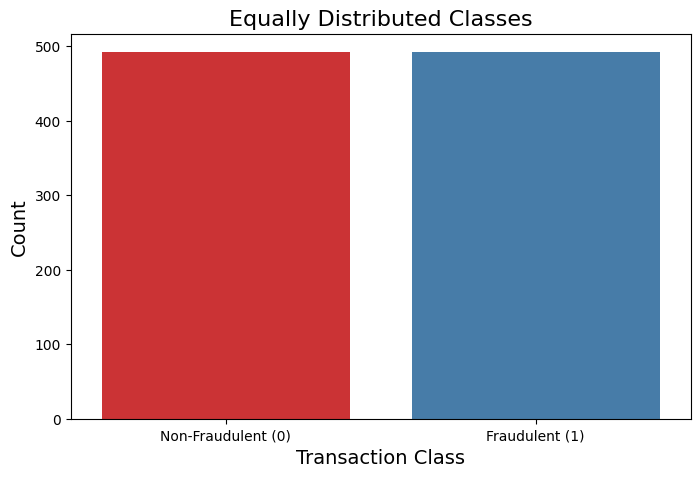

In [13]:
# TODO: Print the distribution of the classes in the subsample dataset new_df as proportions
class_distribution = new_df['Class'].value_counts(normalize=True) * 100
print("Class Distribution (%):\n", class_distribution)

# TODO: Use seaborn's countplot function to visualize the distribution of the classes in new_df
plt.figure(figsize=(8, 5))
sns.countplot(data=new_df, x='Class', palette='Set1')  # Using a predefined color palette

# TODO: Set plot title and font size
plt.title('Equally Distributed Classes', fontsize=16)
plt.xlabel('Transaction Class', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.xticks(ticks=[0, 1], labels=['Non-Fraudulent (0)', 'Fraudulent (1)'])
plt.show()

<h3> Correlation Matrices </h3>
Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud. However, it is important that we use the correct dataframe (subsample)  in order for us to see which features have a high positive or negative correlation with regards to fraud transactions.

### Summary and Explanation:
<ul>
<li><b>Negative Correlations: </b>V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.  </li>
<li> <b> Positive Correlations: </b> V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction. </li>
<li> <b>BoxPlots: </b>  We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions. </li>
</ul>


**Note: ** We have to make sure we use the subsample in our correlation matrix or else our correlation matrix will be affected by the high imbalance between our classes. This occurs due to the high class imbalance in the original dataframe.

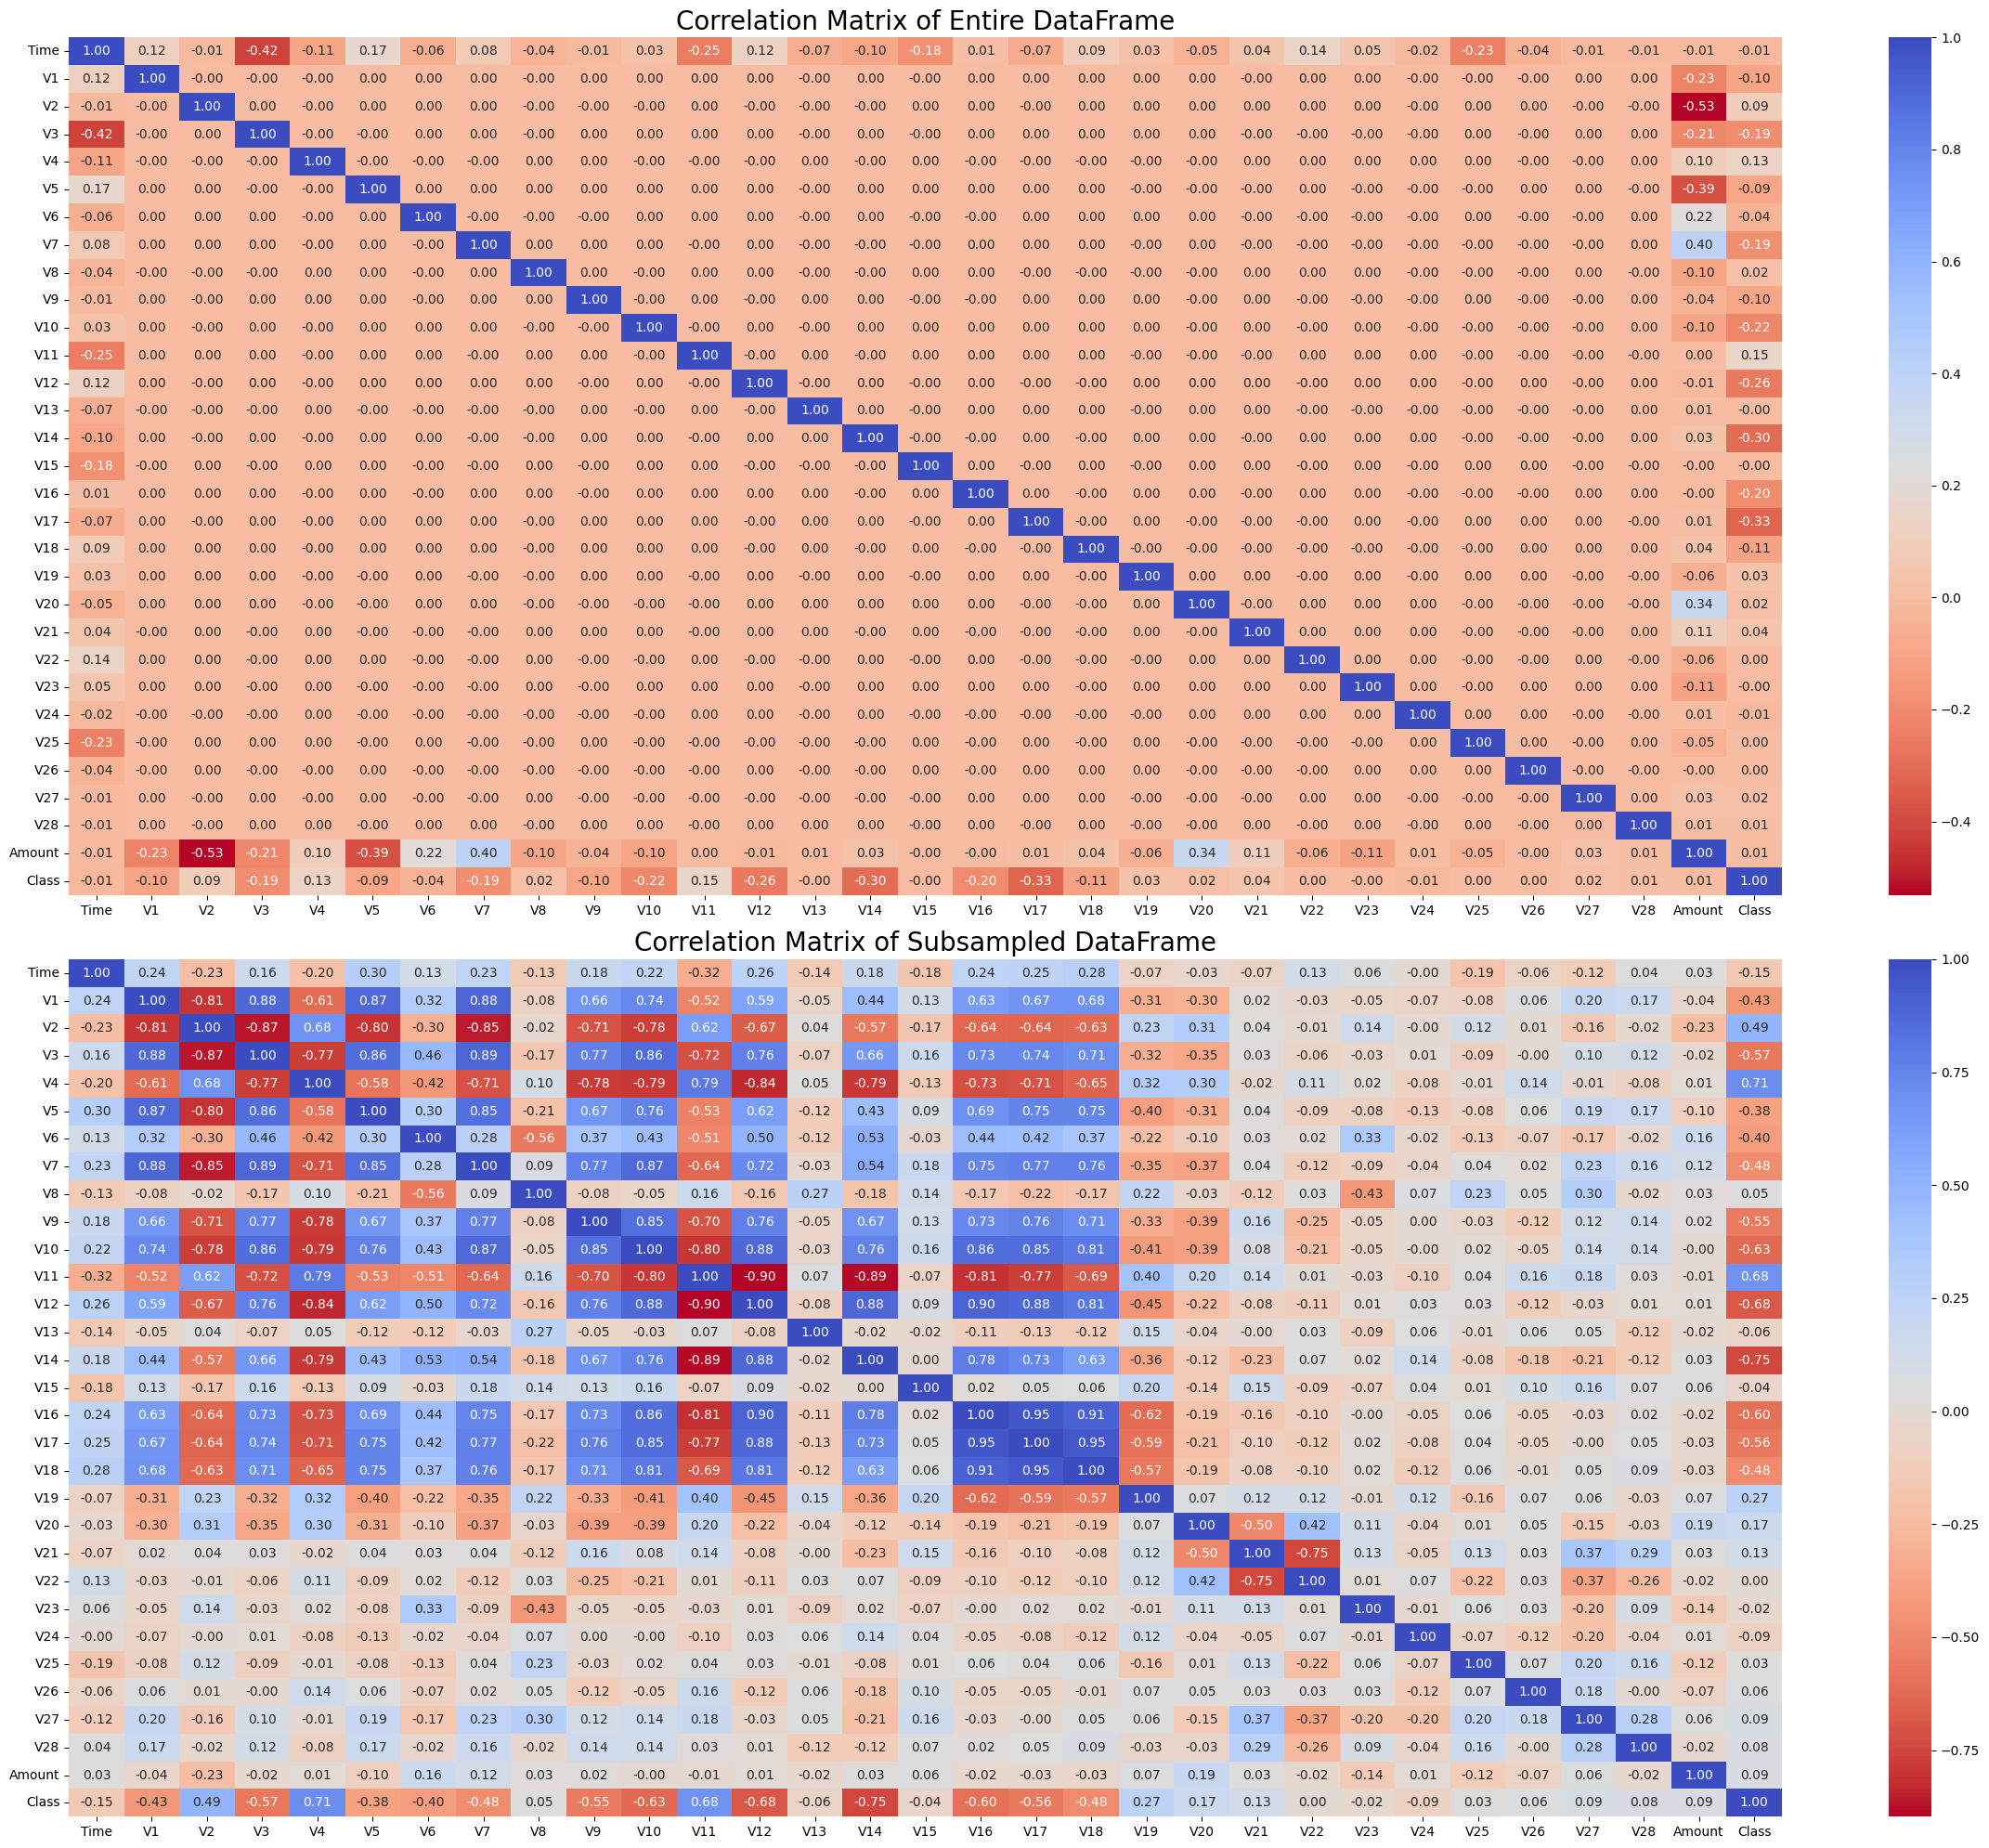

In [14]:
# Make sure we use the subsample in our correlation
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 20))

# Entire DataFrame
# TODO: Calculate the correlation matrix corr of the dataframe df
corr = df.corr()

# TODO: Visualize the correlation matrix using seaborn's heatmap function
sns.heatmap(corr, cmap='coolwarm_r', annot=True, fmt=".2f", ax=ax1)
ax1.set_title('Correlation Matrix of Entire DataFrame', fontsize=20)

# Calculate the correlation matrix for the subsampled dataset
# TODO: Calculate the correlation matrix sub_sample_corr for the dataframe new_df
sub_sample_corr = new_df.corr()

# TODO: Visualize this correlation matrix using seaborn's heatmap function
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot=True, fmt=".2f", ax=ax2)
ax2.set_title('Correlation Matrix of Subsampled DataFrame', fontsize=20)

# Show the plots
plt.tight_layout()
plt.show()

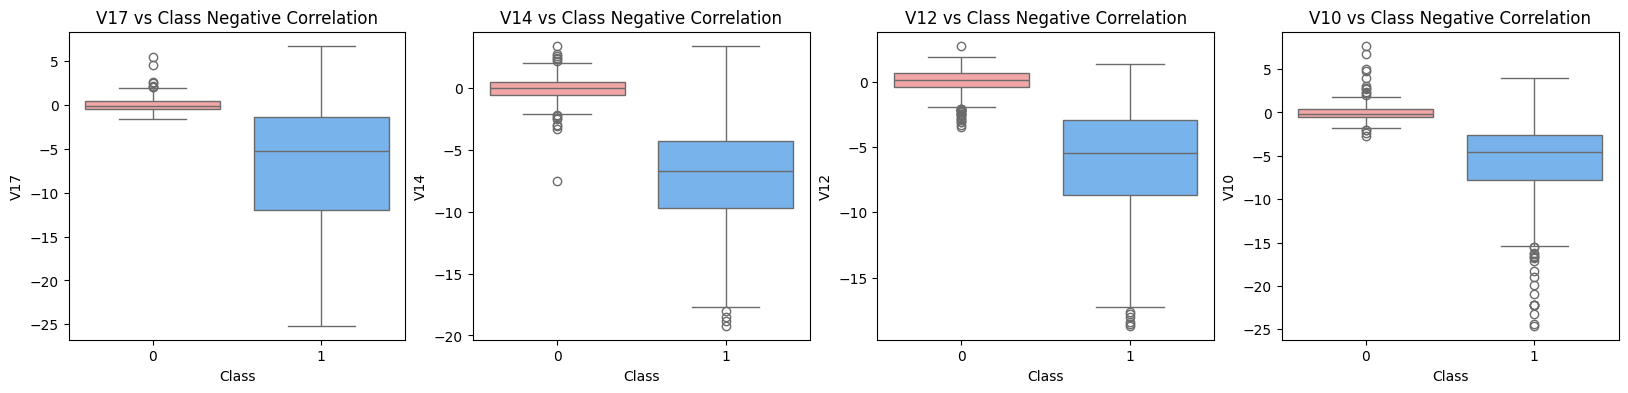

In [16]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Define a color palette for the classes
colors = ["#FF9999", "#66B3FF"]  # Colors for non-fraud (0) and fraud (1)

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

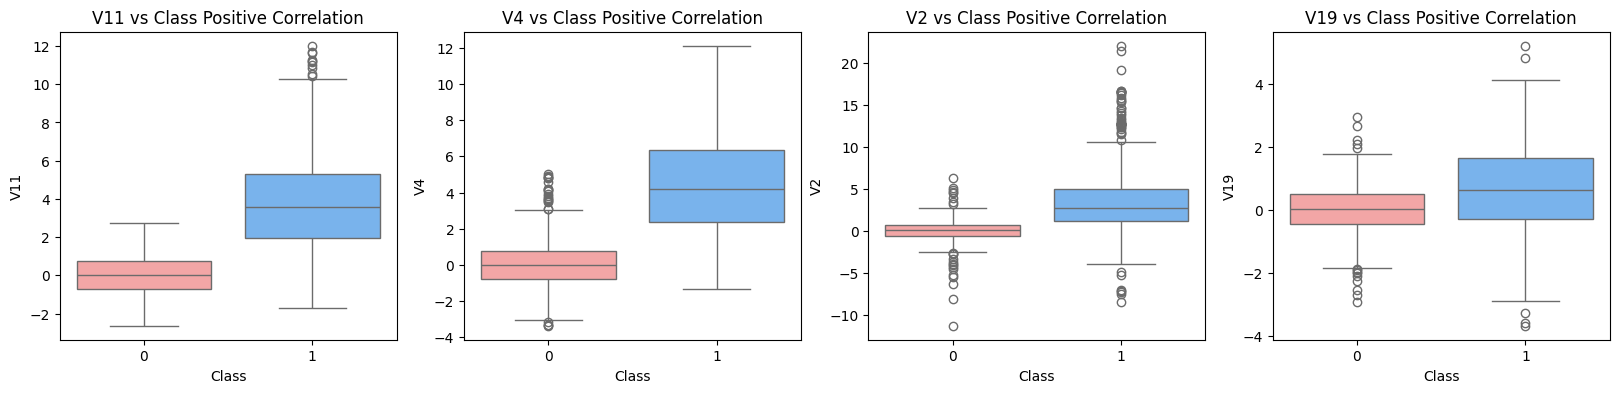

In [17]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()